In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


# New Section

In [66]:
import numpy as np

class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None


    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        ones_row = np.ones((len(X), 1))
        X = np.concatenate((ones_row, X), axis=1)
        coef = np.linalg.inv((X.T @ X)) @ X.T @ y
        self.coef_ = coef[1:]
        self.intercept_ = coef[0]

    '''def predict(self, X):
        res = []
        for val in range(X.shape[0]):
          res.append(np.sum(np.array(X.iloc[val]) * self.coef_) + self.intercept_)
        return res
    '''


    def predict(self, X):
        return X @ self.coef_ + self.intercept_

In [5]:
array = np.array([[1, 2], [3, 4],[2,3]])

In [6]:
len(array[0])

2

In [7]:
import numpy as np

# Создание двух массивов
array1 = np.array([[1, 2, 3], [4, 5, 6]])
array2 = np.array([[7, 8, 9], [10, 11, 12]])

# Вертикальное объединение массивов
result = np.vstack((array1, array2))

# Вывод результата
print(result)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [8]:
X = data[['длина плавника']]
y = data['длина клюва']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [9]:
from sklearn.model_selection import train_test_split

In [67]:
myLR = MyLinearRegression()

In [59]:
myLR.fit(X_train, y_train)

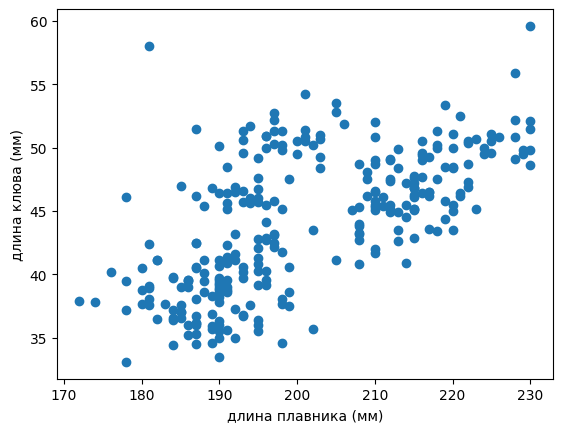

In [13]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('длина плавника (мм)');
plt.ylabel('длина клюва (мм)');

plt.show()

In [14]:
myLR.coef_, myLR.intercept_

(array([0.245645]), -5.247429152153218)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


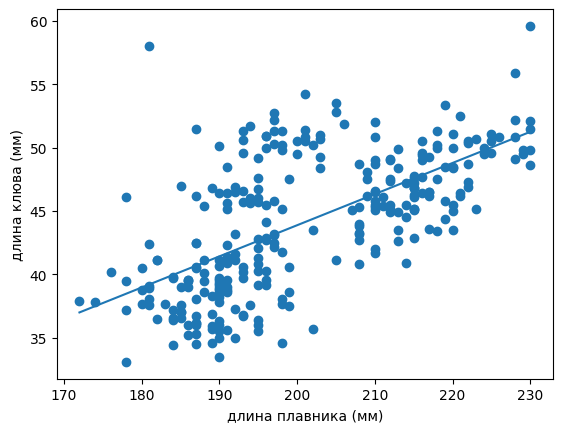

In [15]:
def line(x):
  return myLR.coef_ * x + myLR.intercept_

plt.scatter(X_train, y_train)
plt.xlabel('длина плавника (мм)');
plt.ylabel('длина клюва (мм)');

x = [np.min(X_train), np.max(X_train)]
y = line(x)


plt.plot(x, y)

In [16]:

from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)
lr.coef_

array([0.245645])

In [31]:
assert np.allclose(myLR.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(myLR.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

In [45]:
my_predictions = myLR.predict(X_test)
sklearn_predictions = lr.predict(X_test)

In [41]:
X_train.shape

(283, 1)

In [46]:
assert np.allclose(my_predictions, sklearn_predictions), "Ошибка: метод predict выдает неверные результаты!"

In [47]:
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


In [49]:
y = data['длина плавника']
X = data.drop(columns=['длина плавника'])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [69]:
myLR.fit(X_train, y_train)


In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [71]:
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
assert np.allclose(myLR.coef_, lr.coef_), "Ошибка"

In [73]:
assert np.allclose(myLR.intercept_, lr.intercept_), "Ошибка"

In [74]:
assert np.allclose(myLR.predict(X_test), lr.predict(X_test)), "Ошибка"